<a href="https://colab.research.google.com/github/Akhil-2001/NLP/blob/main/ANN_NLP_BERT_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow_text

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
df = pd.read_csv('/content/sample_data/Restaurant_Reviews_-_Restaurant_Reviews.csv')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


1    500
0    500
Name: Liked, dtype: int64

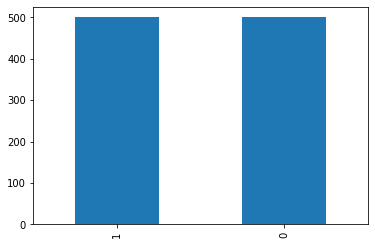

In [ ]:
import matplotlib.pyplot as plt
df['Liked'].value_counts().plot(kind ='bar') 
df['Liked'].value_counts()

In [ ]:
df['Review'][30]

'Also there are combos like a burger, fries, and beer for 23 which is a decent deal.'

In [ ]:
df['Review'][56]

'The Heart Attack Grill in downtown Vegas is an absolutely flat-lined excuse for a restaurant.'

In [ ]:
x=df['Review'].values#inputs
y=df['Liked'].values #outputs

In [ ]:
# import nltk
# nltk.download('stopwords') #stopwords download
# nltk.download('punkt') #tokenizer download  
# nltk.download('wordnet') #lemmatizer download

In [ ]:
# import re
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# for i in range(len(x)):
#   review = re.sub('[^a-zA-Z]',' ',x[i]) 
#   review = review.lower()
#   review = review.split()

#   review_stem = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
#   review_stem = ' '.join(review_stem) 
#   x[i] = review_stem


In [ ]:

# vect =  CountVectorizer(stop_words ='english')    #count vectorizer
# x_train_vect= vect.fit_transform(x_train)
# x_test_vect= vect.fit_transform(x_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
#l = tf.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(48, activation='LeakyReLU')(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(24, activation='LeakyReLU')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(3, activation='LeakyReLU')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
# def get_sentence_embeding(sentences):
#     preprocessed_text = bert_preprocess(sentences)
#     return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
model.fit(x_train, y_train, validation_split=0.2, epochs=25)
loss,accuracy=model.evaluate(x_test, y_test)
accuracy


Epoch 1/25
19/19 [==============================] - 27s 820ms/step - loss: 0.7237 - accuracy: 0.5183 - val_loss: 0.6795 - val_accuracy: 0.5133
Epoch 2/25
19/19 [==============================] - 14s 766ms/step - loss: 0.6884 - accuracy: 0.5517 - val_loss: 0.6633 - val_accuracy: 0.6467
Epoch 3/25
19/19 [==============================] - 14s 766ms/step - loss: 0.6893 - accuracy: 0.5433 - val_loss: 0.6521 - val_accuracy: 0.6400
Epoch 4/25
19/19 [==============================] - 14s 763ms/step - loss: 0.6725 - accuracy: 0.5717 - val_loss: 0.6471 - val_accuracy: 0.6467
Epoch 5/25
19/19 [==============================] - 14s 764ms/step - loss: 0.6842 - accuracy: 0.5950 - val_loss: 0.6868 - val_accuracy: 0.5133
Epoch 6/25
19/19 [==============================] - 14s 762ms/step - loss: 0.6817 - accuracy: 0.5417 - val_loss: 0.6338 - val_accuracy: 0.6400
Epoch 7/25
19/19 [==============================] - 14s 761ms/step - loss: 0.6580 - accuracy: 0.6017 - val_loss: 0.6207 - val_accuracy: 0.6733

0.8399999737739563

In [ ]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 5s 595ms/step - loss: 0.3727 - accuracy: 0.8400


[0.37273821234703064, 0.8399999737739563]

In [ ]:
model.predict(["food is really terrible"])

array([[0.08150421]], dtype=float32)